In [1]:
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np

dataName = '180710_HAECs_NoFlow_HAEC2\sample1'

dataOrganization = 'Culture_16bits'
codebook = 'HAEC1E1'

from merlin.core import dataset
from merlin.core import executor
from merlin.core import scheduler

import json

dSet = dataset.MERFISHDataSet(
        dataName, 
        dataOrganizationName=dataOrganization,
        codebookName=codebook)

e = executor.LocalExecutor()

with open('test_analysis_parameters.json', 'r') as f:
    s = scheduler.Scheduler(dSet, e, json.load(f))

C:\Users\George\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
taskNames = list(s.analysisTasks.keys())
pprint(taskNames)

['FiducialCorrelationWarp',
 'DeconvolutionPreprocess',
 'Optimize',
 'Decode',
 'SimpleGlobalAlignment',
 'GenerateMosaic',
 'PlotPerformance',
 'FilterBarcodes',
 'SegmentCells']


In [6]:
b = s.analysisTasks['SegmentCells'].get_cell_boundaries()
len(b)

6114

In [4]:
def plot_boundary(c):
    plt.plot([x[0] for x in c], [x[1] for x in c])


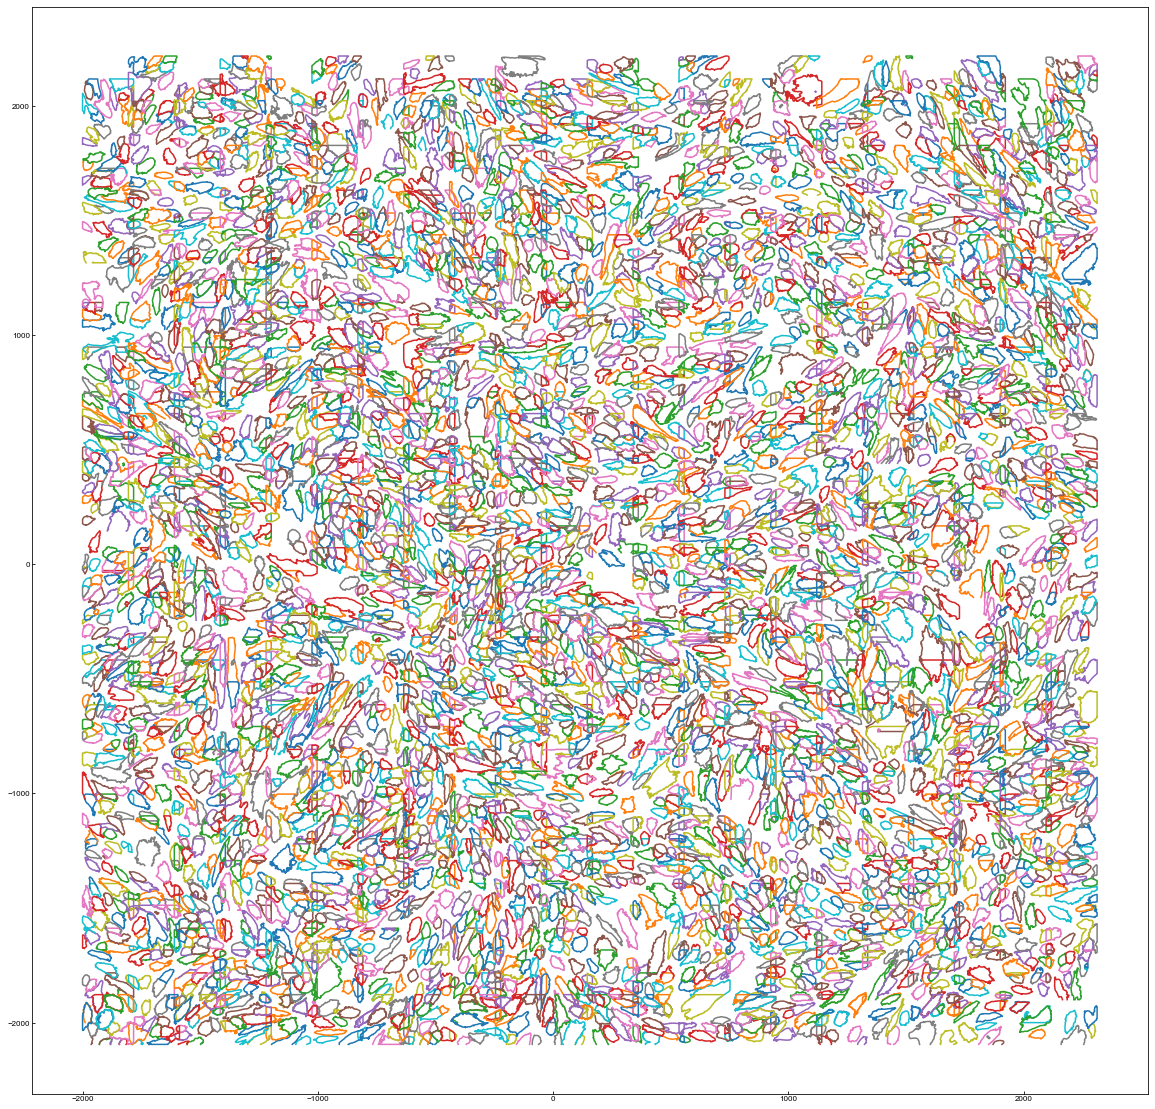

In [5]:
plt.figure(figsize=(20,20))
p = [plot_boundary(x) for x in b]

In [35]:
c = [np.reshape(x, (1,x.shape[0],2)).astype(np.float) for x in t]

In [36]:
import cv2

In [37]:
tc = [cv2.transform(x, s.analysisTasks['SimpleGlobalAlignment'].fov_to_global_transform(10))[0,:,:2] for x in c]

In [31]:
dSet.get_fovs()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

[None, None, None, None, None, None, None, None, None, None, None, None, None]

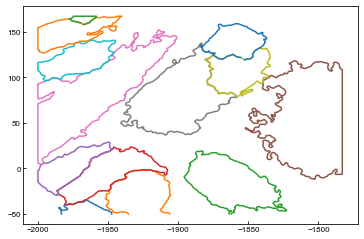

In [40]:
[plot_boundary(x) for x in tc]

In [29]:
t[0].dtype

dtype('int32')

In [7]:
np.empty((0,), dtype='O')

array([], dtype=object)

In [8]:
b[1]

array([[-1988.97600013, -2000.        ],
       [-1988.97600013, -1999.57600001],
       [-1989.08200013, -1999.25800001],
       [-1989.40000013, -1998.62200002],
       [-1990.03600012, -1997.35000003],
       [-1990.67200011, -1996.39600004],
       [-1990.99000011, -1995.76000005],
       [-1991.3080001 , -1994.80600006],
       [-1991.8380001 , -1993.00400008],
       [-1991.9440001 , -1992.58000009],
       [-1992.05000009, -1992.15600009],
       [-1992.15600009, -1991.6260001 ],
       [-1992.15600009, -1990.88400011],
       [-1992.26200009, -1990.35400011],
       [-1992.36800009, -1989.93000012],
       [-1992.47400009, -1989.61200012],
       [-1992.89800008, -1988.76400013],
       [-1993.00400008, -1988.44600014],
       [-1993.11000008, -1988.12800014],
       [-1993.42800008, -1986.85600016],
       [-1993.53400008, -1986.22000016],
       [-1993.53400008, -1985.47800017],
       [-1993.64000008, -1984.84200018],
       [-1993.74600007, -1984.52400018],
       [-1994.06

In [6]:
dSet.load_analysis_result('cell_boundaries', 'SegmentCells', resultIndex=0).dtype

dtype('O')